<a href="https://colab.research.google.com/github/Sowmya-BH/Projects/blob/main/Module2-Copy_of_Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

import time

## **Scrapping Movies Data**

In [3]:
'''
Purpose: This function retrieves the HTML content of the target URL. It would
likely use the requests library to make an HTTP request

Arguments(input):
url->(the target URL, which searches for movies released from the year 2000
onwards on JustWatch India.)

Return Value(output):
soup: A BeautifulSoup object representing the parsed HTML content.

'''
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'

}

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]
# movie_urls
# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)

In [4]:
'''
Purpose: A function to parse the provided BeautifulSoup object (soup) and extracts basic movie
information: title and URL

Arguments(input):
soup: A BeautifulSoup object representing the parsed HTML content.

Return Value(output):
A list of dictionaries, where each dictionary contains two key-value pairs:
'Title': The title of the movie.
'URL': The URL of the movie.

'''
def extract_movie_info(soup):
    movies = []
    # Locate movie blocks
    movie_blocks = soup.find_all('div', class_='title-list-grid__item')

    for block in movie_blocks:
        # Extract title from 'data-title' attribute
        title = block['data-title'] if block.has_attr('data-title') else 'N/A'

        #  code constructs a complete URL for a movie by combining the base URL and the relative URL extracted from the HTML content.
        movie_url = "https://www.justwatch.com" + block.find('a', href=True)['href'] if block.find('a', href=True) else 'N/A'

        movies.append({
            'Title': title,
            'URL': movie_url,
        })
    return movies

In [ ]:
# url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
# soup = fetch_movie_urls(url)
# print(soup.prettify())

In [5]:
# Main script
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

#scrapes movie information from JustWatch
soup = fetch_movie_urls(url)
movies = extract_movie_info(soup)
count =0

#  iterates through extracted data (- list of movie dictionaries) and prints the URL of each movie.
for movie in movies:
    print(movie)
    count+=1
print(count)

{'Title': 'Bhool Bhulaiyaa 3', 'URL': 'https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3'}
{'Title': 'Stree 2: Sarkate Ka Aatank', 'URL': 'https://www.justwatch.com/in/movie/stree-2'}
{'Title': 'Deadpool & Wolverine', 'URL': 'https://www.justwatch.com/in/movie/deadpool-3'}
{'Title': 'The Substance', 'URL': 'https://www.justwatch.com/in/movie/the-substance'}
{'Title': 'Devara Part 1', 'URL': 'https://www.justwatch.com/in/movie/ntr-30'}
{'Title': 'Meiyazhagan', 'URL': 'https://www.justwatch.com/in/movie/meiyazhagan'}
{'Title': 'Vettaiyan', 'URL': 'https://www.justwatch.com/in/movie/vettaiyan'}
{'Title': 'Venom: The Last Dance', 'URL': 'https://www.justwatch.com/in/movie/venom-3-2024'}
{'Title': 'Kishkindha Kaandam', 'URL': 'https://www.justwatch.com/in/movie/kishkkindha-kandam'}
{'Title': 'Do Patti', 'URL': 'https://www.justwatch.com/in/movie/do-patti'}
{'Title': 'Singham Again', 'URL': 'https://www.justwatch.com/in/movie/singham-again-2024-0'}
{'Title': 'Gladiator', 'URL': 'https://w

In [6]:
for movie in movies:
  print(movie['URL'])

https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3
https://www.justwatch.com/in/movie/stree-2
https://www.justwatch.com/in/movie/deadpool-3
https://www.justwatch.com/in/movie/the-substance
https://www.justwatch.com/in/movie/ntr-30
https://www.justwatch.com/in/movie/meiyazhagan
https://www.justwatch.com/in/movie/vettaiyan
https://www.justwatch.com/in/movie/venom-3-2024
https://www.justwatch.com/in/movie/kishkkindha-kandam
https://www.justwatch.com/in/movie/do-patti
https://www.justwatch.com/in/movie/singham-again-2024-0
https://www.justwatch.com/in/movie/gladiator
https://www.justwatch.com/in/movie/amaran-2024
https://www.justwatch.com/in/movie/martin
https://www.justwatch.com/in/movie/lubber-pandhu
https://www.justwatch.com/in/movie/the-wild-robot
https://www.justwatch.com/in/movie/alien-romulus
https://www.justwatch.com/in/movie/black-2024
https://www.justwatch.com/in/movie/gaganachari
https://www.justwatch.com/in/movie/siddharth-roy
https://www.justwatch.com/in/movie/ajayante-randa

In [7]:
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'

}

In [8]:
url_input ='https://www.justwatch.com/in/movie/vettaiyan'
response = requests.get(url_input, headers=headers)
if response.status_code != 200:
  print("Failed to retrieve the page, status code:", response.status_code)
html_content = BeautifulSoup(response.text, 'html.parser')
print(html_content.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="yes" data-vue-meta="ssr" name="mobile-web-app-capable"/>
  <meta content="yes" data-vue-meta="ssr" name="apple-mobile-web-app-capable"/>
  <meta content="#182531" data-vue-meta="ssr" name="theme-color"/>
  <meta content="AkO0-dINGfhSod2X6LeYIp9hwZc8ShczjzJA2a47dME" data-vue-meta

In [ ]:
html_content.find_all('h1')[0]#,class_='title-detail-hero__details__title')

<h1 class="title-detail-hero__details__title" data-v-7d472b18=""> Vettaiyan <span class="release-year" data-v-7d472b18="">(2024)</span></h1>

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here


## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
html_content.find_all('h1')[0].text.split('(')[0].strip()

'Vettaiyan'

## **Scrapping release Year**

In [ ]:
# Write Your Code here
html_content.find_all('h1')[0].text.strip().split(' ')[1]

'(2024)'

## **Scrapping Genres**

In [ ]:
# Write Your Code here
genres = set()
for x in html_content.find_all('div',class_='detail-infos'):
  for h3 in x.find_all('h3', string='Genres'):
        # Find the next sibling, which is the actual genre list
        genre_list = h3.next_sibling.text.strip().split(', ')
        genres.update(genre_list)
  #print(x.find_all('h3'))
genres
    #print(x.find_all('span'))
  # if (x.find_all('h3').text=='Genres'):
  #   print(x.find_all('span'))

{'Action & Adventure', 'Crime', 'Drama'}

In [ ]:
genres = [h3.next_sibling.text.strip().split(', ') for x in html_content.find_all('div', class_='detail-infos') for h3 in x.find_all('h3', string='Genres')]
genres[0]

['Crime', 'Drama', 'Action & Adventure']

## **Scrapping IMBD Rating**

In [19]:
for h3 in html_content.find_all('h3', string='Rating'):
  print(h3)
  if h3.next_sibling:
    rating = (h3.next_sibling.text.strip())
  # else:
  #   rating = 'N/A'
#rating

In [12]:
for h3 in html_content.find_all('h3', string='Rating'):
  print(h3.next_sibling.text.strip())

In [17]:
rating = float([h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string='Rating')][0].split(' ')[0])
rating

IndexError: list index out of range

In [ ]:
# Write Your Code here
rating =0
# for x in html_content.find_all('div',class_='detail-infos'):
#   if (x.find_all('h3', string='Rating')):
#     rating = h3.next_sibling.text.strip()
#     print(rating)
#   for h3 in x.find_all('h3', string='Rating'):
#     rating = h3.next_sibling.text.strip()
# rating
div_tag = html_content.find('div',class_='detail-infos',string='Rating')
if div_tag:
  #for h3 in div_tag[0].find_all():
  rating = div_tag.find_next_sibling('h3',class_='detail-infos__subheading').text.strip()
  print(rating)

# rating = html_content.find('h3',class_='detail-infos__subheading"',string ='Rating')
# rating

In [ ]:
rating = float([h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string='Rating')][0].split(' ')[0])
#float(rating[0].split(' ')[0])
rating

7.5

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here Runtime
runtime = [h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string='Runtime')][0]
runtime

'2h 43min'

## **Scrapping Age Rating**

In [ ]:
print(html_content.find_all('h3', class_='detail-infos',string='Age rating'))
  #print(h3)#.next_sibling.text.strip())

[]


In [ ]:
html_content.find_all('h3', class_='detail-infos')#,string='Age rating')

[]

In [ ]:
# Write Your Code here
Age_Rating = [h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string='Age rating')]
Age_Rating

[]

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
Production_country = [h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string=' Production country ')]
print(set(Production_country))

{'France, United Kingdom'}


## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
# services = []
# for x in html_content.find_all('img',class_='offer__icon'):
#   services.append(x['alt'])
# services
services = set([x['alt'] for x in html_content.find_all('img', class_='offer__icon')])
print(services)


{'Amazon Video', 'Amazon Prime Video', 'Bookmyshow'}


## **Now Creating Movies DataFrame**

In [20]:
# Write Your Code here
'''
Purpose: To scrape and extract specific information about movies from a given website
automates the process of extracting specific details about movies from JustWatch and
organizes it into a structured format for further analysis

'''
movie_info = []

#for loop iterates through a list of movies, likely obtained from a previous scraping or data source.
for movie in movies:
  # a 4-second delay between requests to the JustWatch website to avoid blockage.
  time.sleep(4) #Limitation: did not experiment -> optimal delay can vary depending on the website's specific rate limits and your scraping frequency.

  #url_input ='https://www.justwatch.com/in/movie/vettaiyan'
  response = requests.get(movie['URL'], headers=headers)
  if response.status_code != 200:
    print("Failed to retrieve the page, status code:", response.status_code)
  html_content = BeautifulSoup(response.text, 'html.parser')

  #To extract release_year
  release_year = html_content.find_all('h1')[0].text.strip().split(' ')[1]

  #To extract genres
  genres = [h3.next_sibling.text.strip().split(', ') for x in html_content.find_all('div', class_='detail-infos') for h3 in x.find_all('h3', string='Genres')][0]

  #genres
  # genres = set() #genres
  # for x in html_content.find_all('div',class_='detail-infos'):
  #   for h3 in x.find_all('h3', string='Genres'):
  #     # Find the next sibling, which is the actual genre list
  #     genre_list = h3.next_sibling.text.strip().split(', ')
  #     genres.update(genre_list)

  #To extract streaming services
  services = set([x['alt'] for x in html_content.find_all('img', class_='offer__icon')])

  #To extract age_rating
  Age_Rating = [h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string='Age rating')]

  #To extract Production_country
  Production_country = set([h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string=' Production country ')])

  #To extract runtime
  runtime = [h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string='Runtime')][0]
  rating = next((h3.next_sibling.text.strip() for h3 in html_content.find_all('h3', string='Rating') if h3.next_sibling), 'N/A')

  #Creating Movie Information Dictionary for each movie, storing the extracted information under keys like Title, URL
  movie_info.append({
            'Title': movie['Title'],
            'URL': movie['URL'],
            'Release Year': release_year,
            'Genre': genres,
            'IMDb Rating': rating,
            'Streaming Services': services,
            'Age Rating': Age_Rating,
            'Production Country': Production_country,
            'Runtime': runtime
        })

  #movie_title = html_content.find_all('h1')[0].text.split('(')[0].strip()

  #print(html_content.prettify())

In [21]:
# creates a Pandas DataFrame from a list of dictionaries, movie_info.
movie_df = pd.DataFrame(movie_info)

In [22]:
#adds a new column named "Type" to the movie_df DataFrame  useful for categorizing the data, especially when you're combining data
movie_df['Type']="Movie"
movie_df

Title  \
0            Bhool Bhulaiyaa 3   
1   Stree 2: Sarkate Ka Aatank   
2         Deadpool & Wolverine   
3                The Substance   
4                Devara Part 1   
..                         ...   
95                Bullet Train   
96                  Bramayugam   
97              Mathu Vadalara   
98                Ready or Not   
99                     Red One   

                                                  URL Release Year  \
0   https://www.justwatch.com/in/movie/bhool-bhula...    Bhulaiyaa   
1          https://www.justwatch.com/in/movie/stree-2           2:   
2       https://www.justwatch.com/in/movie/deadpool-3            &   
3    https://www.justwatch.com/in/movie/the-substance    Substance   
4           https://www.justwatch.com/in/movie/ntr-30         Part   
..                                                ...          ...   
95    https://www.justwatch.com/in/movie/bullet-train        Train   
96      https://www.justwatch.com/in/movie/bramayugam       (2024)   
97  https://www.justwatch.com/in/movie/mathu-vadalara     Vadalara   
98  https://www.justwatch.com/in/movie/ready-or-no...           or   
99         https://www.justwatch.com/in/movie/red-one          One   

                                                Genre     IMDb Rating  \
0                                    [Comedy, Horror]   5.2  (70k)46%   
1                                    [Comedy, Horror]   7.0  (35k)62%   
2       [Action & Adventure, Comedy, Science-Fiction]  7.7  (393k)79%   
3                                     [Drama, Horror]  7.5  (143k)90%   
4     [Action & Adventure, Drama, Mystery & Thriller]   6.1  (15k)33%   
..                                                ...             ...   
95   [Comedy, Mystery & Thriller, Action & Adventure]  7.3  (468k)53%   
96                [Drama, Horror, Mystery & Thriller]      7.8  (12k)   
97                [Crime, Comedy, Mystery & Thriller]       8.2  (5k)   
98  [Horror, Mystery & Thriller, Action & Adventur...  6.9  (200k)89%   
99              [Fantasy, Action & Adventure, Comedy]   6.9  (33k)31%   

                                   Streaming Services Age Rating  \
0                                        {Bookmyshow}   [UA, UA]   
1                  {Amazon Video, Amazon Prime Video}   [UA, UA]   
2                                 {Apple TV, Hotstar}     [A, A]   
3                         {MUBI, MUBI Amazon Channel}         []   
4                               {Bookmyshow, Netflix}   [UA, UA]   
..                                                ...        ...   
95  {Sony Liv, Amazon Video, Zee5, Apple TV, Netflix}     [A, A]   
96                       {VI movies and tv, Sony Liv}   [UA, UA]   
97                               {Amazon Prime Video}   [UA, UA]   
98                  {Amazon Video, Apple TV, Netflix}     [A, A]   
99                                                 {}         []   

          Production Country   Runtime   Type  
0                    {India}  2h 38min  Movie  
1                    {India}  2h 27min  Movie  
2            {United States}   2h 8min  Movie  
3   {France, United Kingdom}  2h 20min  Movie  
4                    {India}  2h 56min  Movie  
..                       ...       ...    ...  
95           {United States}   2h 6min  Movie  
96                   {India}  2h 19min  Movie  
97                   {India}  2h 10min  Movie  
98           {United States}  1h 35min  Movie  
99           {United States}   2h 3min  Movie  

[100 rows x 10 columns]

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
movie_df.to_csv('/content/drive/My Drive/movie_data.csv', index=False)

In [28]:
for col in movie_df.columns:
  print(movie_df[col].value_counts())
  print("*"*50)

Title
Bhool Bhulaiyaa 3                         1
Premalu                                   1
Apocalypse Z: The Beginning of the End    1
Speak No Evil                             1
Vivekanandan Viralaanu                    1
                                         ..
Transformers One                          1
Khel Khel Mein                            1
Tumbbad                                   1
All We Imagine as Light                   1
Red One                                   1
Name: count, Length: 100, dtype: int64
**************************************************
URL
https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3                    1
https://www.justwatch.com/in/movie/premalu                              1
https://www.justwatch.com/in/movie/apocalypse-z-el-principio-del-fin    1
https://www.justwatch.com/in/movie/speak-no-evil-2024                   1
https://www.justwatch.com/in/movie/vivekanandan-viralaanu               1
                                              

In [1]:
movie_df.describe()

NameError: name 'movie_df' is not defined

In [ ]:
movie_df.describe(include='O')

Title                                                URL  \
count                 100                                                100   
unique                100                                                100   
top     Bhool Bhulaiyaa 3  https://www.justwatch.com/in/movie/bhool-bhula...   
freq                    1                                                  1   

       Release Year    Genre Streaming Services Age Rating Production Country  \
count           100      100                100        100                100   
unique           62       73                 47          4                 22   
top          (2024)  [Drama]       {Bookmyshow}   [UA, UA]            {India}   
freq             27        5                 12         38                 58   

         Runtime   Type  
count        100    100  
unique        68      1  
top     2h 38min  Movie  
freq           4    100

In [ ]:
## Replace non-numeric values (e.g., 'N/A') with NaN
movie_df = movie_df.replace('N/A', np.nan)


In [ ]:
# To get information about its columns, data types, and the number of non-null values in each column
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               100 non-null    object 
 1   URL                 100 non-null    object 
 2   Release Year        100 non-null    object 
 3   Genre               100 non-null    object 
 4   IMDb Rating         100 non-null    float64
 5   Streaming Services  100 non-null    object 
 6   Age Rating          100 non-null    object 
 7   Production Country  100 non-null    object 
 8   Runtime             100 non-null    object 
 9   Type                100 non-null    object 
dtypes: float64(1), object(9)
memory usage: 7.9+ KB


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(tv_url,headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv=BeautifulSoup(page.text,'html.parser')

# Printing the prettified HTML content
print(soup_tv.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
for x in soup_tv.find_all('a'):
  x[href] if block.has_attr(href)

SyntaxError: expected 'else' after 'if' expression (<ipython-input-63-2d50db0b8213>, line 3)

In [ ]:
# To extract links to TV shows from the parsed HTML content (soup_tv).
# An empty list to store the extracted TV show URLs.
tvshows = []

# A variable count is initialized to 0, likely to keep track of the number of extracted TV show - not required
count = 0

#iterates through all  Anchor tags and checks if the current link element has an href attribute
for link in soup_tv.find_all('a'):
    if 'href' in link.attrs:
      #If the href attribute exists, this line retrieves its value and stores it in the variable href_value.
        href_value = link['href']

        #checks for irrelevant links and skips to the next link using continue
        substring = '/in/tv-show/from'
        if substring in href_value:
            continue

        # checks for potential TV show URl and constructs the complete URL for the TV show page
        elif '/in/tv-show/' in href_value:
          count+=1 #not required
          #The constructed URL is then appended to the tvshows list.
          tvshows.append('https://www.justwatch.com'+href_value)


In [ ]:
# just adding a layer of check
print(count)

108


In [ ]:
# Write Your Code here
#to retrieve and display the HTML content of a specific TV show page on JustWatch
url_input ='https://www.justwatch.com/in/tv-show/citadel-honey-bunny'
response = requests.get(url_input, headers=headers)
if response.status_code != 200:
  print("Failed to retrieve the page, status code:", response.status_code)
tv_shows_content = BeautifulSoup(response.text, 'html.parser')
print(tv_shows_content.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="yes" data-vue-meta="ssr" name="mobile-web-app-capable"/>
  <meta content="yes" data-vue-meta="ssr" name="apple-mobile-web-app-capable"/>
  <meta content="#182531" data-vue-meta="ssr" name="theme-color"/>
  <meta content="AkO0-dINGfhSod2X6LeYIp9hwZc8ShczjzJA2a47dME" data-vue-meta

## **Fetching Tv Show Title details**

In [ ]:
tv_shows_content.find_all('h1')[0].text.split('(')[0].strip()

'Doubt'

## **Fetching Release Year**

In [ ]:
# Write Your Code here
tv_shows_content.find_all('h1')[0].text.split('(')[1].strip(')')

'2006'

## **Fetching TV Show Genre Details**

In [ ]:
# # for x in html_content.find_all('div', class_='detail-infos__'):
# for x in tv_hows_content.find_all('h3', class_='detail-infos__subheadings,string='Genres'):
#   print(x.next_sibling.text.strip().split(', '))[0]
#   # for h3 in (x.find_all('h3', string='Genres')):
#   #   print(h3.find_next_sibling())

# # genh3.next_sibling.text.strip().split(', ')  for h3 in x.find_all('h3', string='Genres')]
# # genres[0]

In [ ]:
for x in tv_shows_content.find_all('div', class_='detail-infos'):
  print(x)
  for h3 in x.find_all('h3', class_='detail-infos__subheading'):
     print(h3.next_sibling.text)

<div class="detail-infos" data-v-0cbf7cc5=""><h3 class="detail-infos__subheading" data-v-0cbf7cc5="">Genres</h3><div class="detail-infos__value" data-v-0cbf7cc5=""><span data-v-0cbf7cc5="">Kids &amp; Family, Reality TV</span><!-- --></div></div>
Kids & Family, Reality TV
<div class="detail-infos" data-v-0cbf7cc5=""><h3 class="detail-infos__subheading" data-v-0cbf7cc5="">Runtime</h3><div class="detail-infos__value" data-v-0cbf7cc5="">1h 15min</div></div>
1h 15min
<div class="detail-infos" data-v-0cbf7cc5=""><h3 class="detail-infos__subheading" data-v-0cbf7cc5="" style="max-width: fit-content"> Production country </h3><div class="detail-infos__value" data-v-0cbf7cc5="">India</div></div>
India
<div class="detail-infos" data-v-0cbf7cc5=""><h3 class="detail-infos__subheading" data-v-0cbf7cc5="">Genres</h3><div class="detail-infos__value" data-v-0cbf7cc5=""><span data-v-0cbf7cc5="">Kids &amp; Family, Reality TV</span><!-- --></div></div>
Kids & Family, Reality TV
<div class="detail-infos" da

In [ ]:
genres = [h3.next_sibling.text.strip().split(', ') for h3 in tv_shows_content.find_all('h3',class_='detail-infos__subheading', string='Genres')][0]
genres

['Kids & Family', 'Reality TV']

## **Fetching IMDB Rating Details**

In [ ]:
for h3 in tv_shows_content.find_all('h3',class_='detail-infos__subheading'):#, string='Rating'):
  print(h3.text)

Genres
Runtime
 Production country 
Genres
Runtime
 Production country 


In [ ]:
# # Write Your Code here
# rating = float([h3.next_sibling.text.strip().split(', ') for h3 in tv_shows_content.find_all('h3',class_='detail-infos__subheading', string='Rating')][0].split(' ')[0])
# rating

IndexError: list index out of range

In [ ]:
rating = float(tv_shows_content.find_all('span',class_='imdb-score')[0].text.split(' ')[0])#

3.6

In [ ]:
tv_shows_content.find_all('span',class_='imdb-score')#,class_='ImDB Logo'):#, string='Rating'):
  #for x in h3.find_all(ck)


[<span class="imdb-score" data-v-57ee618e="">3.6 (4.2k)</span>]

## **Fetching Age Rating Details**

In [ ]:
for x in tv_shows_content.find_all('div', class_='detail-infos'):
  #print(x)
  for h3 in x.find_all('div', class_="detail-infos__subheading",string=' Production country '):
    print(h3.findNextSibling())

In [ ]:
# for x in html_content.find_all('div', class_='detail-infos'):
#   for h3 in x.find_all('h3', class_='detail-infos__subheading',string='Age rating'):
#     print(h3.next_sibling.text.strip()).to_list()


In [ ]:
# Write Your Code here
age_ratings = [h3.next_sibling.text.strip() for x in tv_shows_content.find_all('div', class_='detail-infos') for h3 in x.find_all('h3', string='Age rating')]
age_ratings

[]

In [ ]:
age_ratin = [h3.next_sibling.text.strip().split(', ')for h3 in tv_shows_content.find_all('h3',class_='detail-infos__subheading', string='Age rating')]

In [ ]:
age_ratin

[]

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
Production_Country = [h3.next_sibling.text for x in tv_shows_content.find_all('div', class_='detail-infos') for h3 in x.find_all('h3', class_='detail-infos__subheading',string=' Production country ')][0]
Production_Country

'India'

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
services = set([x['alt'] for x in tv_shows_content.find_all('img', class_='offer__icon')])
print(services)

{'Amazon Prime Video'}


## **Fetching Duration Details**

In [ ]:
# Write Your Code here
Duration = [h3.next_sibling.text for x in tv_shows_content.find_all('div', class_='detail-infos') for h3 in x.find_all('h3', class_='detail-infos__subheading',string='Runtime')][0]
Duration


'50min'

## **Creating TV Show DataFrame**

In [ ]:
for show in tvshows:
  print(show)

https://www.justwatch.com/in/tv-show/the-penguin
https://www.justwatch.com/in/tv-show/citadel-honey-bunny
https://www.justwatch.com/in/tv-show/the-day-of-the-jackal
https://www.justwatch.com/in/tv-show/taaza-khabar
https://www.justwatch.com/in/tv-show/mirzapur
https://www.justwatch.com/in/tv-show/dont-come-home
https://www.justwatch.com/in/tv-show/x-x-x-uncensored
https://www.justwatch.com/in/tv-show/bigg-boss
https://www.justwatch.com/in/tv-show/hellbound
https://www.justwatch.com/in/tv-show/agatha-house-of-harkness
https://www.justwatch.com/in/tv-show/the-diplomat
https://www.justwatch.com/in/tv-show/game-of-thrones
https://www.justwatch.com/in/tv-show/arcane
https://www.justwatch.com/in/tv-show/sweetpea
https://www.justwatch.com/in/tv-show/1000-babies
https://www.justwatch.com/in/tv-show/dune-the-sisterhood
https://www.justwatch.com/in/tv-show/tulsa-king
https://www.justwatch.com/in/tv-show/the-legend-of-hanuman
https://www.justwatch.com/in/tv-show/the-pradeeps-of-pittsburgh
https:/

In [ ]:
(tv_shows_content.find_all('span',class_='imdb-score')) #[0].text.split(' '))#

[]

In [ ]:
# Write Your Code here
# Purpose : to extract various details about TV shows and store them in a structured format

#empty list named tvshow_info is created to store dictionaries containing the extracted information for each TV show.
tvshow_info = []

# to iterate through each URL in the tvshows list, which presumably contains links to individual TV show pages on JustWatch.
for show in tvshows:
  # A 5-second delay is introduced between requests to avoid overloading the JustWatch server and potentially getting blocked.
  time.sleep(5)
  #sends a GET request to retrieve the HTML content
  response = requests.get(show, headers=headers)
  if response.status_code != 200:
    print("Failed to retrieve the page, status code:", response.status_code)
  #The retrieved HTML content is parsed using BeautifulSoup.
  tv_shows_content = BeautifulSoup(response.text, 'html.parser')

  # Extracting Title
  title = tv_shows_content.find_all('h1')[0].text.split('(')[0].strip()

  #Extracting release_year
  release_year = tv_shows_content.find_all('h1')[0].text.split('(')[1].strip(')')

  #Extracting rating
  try:
    rating_element = tv_shows_content.find_all('span', class_='imdb-score')[0]
    rating = float(rating_element.text.strip().split(' ')[0])
  except (IndexError, ValueError):
    rating = "N/A"
  #
  #genres
  # genres = set() #genres
  # for x in html_content.find_all('div',class_='detail-infos'):
  #   for h3 in x.find_all('h3', string='Genres'):
  #     # Find the next sibling, which is the actual genre list
  #     genre_list = h3.next_sibling.text.strip().split(', ')
  #     genres.update(genre_list)

  #Extracting streaming services
  services = set([x['alt'] for x in tv_shows_content.find_all('img', class_='offer__icon')])

  #Extracting age_rating
  Age_Rating = 'N/A'

  #Extracting Production_country
  Production_country = [h3.next_sibling.text for x in tv_shows_content.find_all('div', class_='detail-infos') for h3 in x.find_all('h3', class_='detail-infos__subheading',string=' Production country ')][0]

  #Extracting runtime details
  try:
    runtime_elements = [h3.next_sibling.text.strip() for x in tv_shows_content.find_all('div', class_='detail-infos') for h3 in x.find_all('h3', class_='detail-infos__subheading', string='Runtime')]
    runtime = runtime_elements[0] if runtime_elements else "N/A"
  except IndexError:
    runtime = "N/A"

  #Extracting genre
  genres = [h3.next_sibling.text.strip().split(', ') for h3 in tv_shows_content.find_all('h3',class_='detail-infos__subheading', string='Genres')][0]

  tvshow_info.append({
            'Title': title,
            'URL': show,
            'Release Year': release_year,
            'Genre': genres,
            'IMDb Rating': rating,
            'Streaming Services': services,
            'Age Rating': Age_Rating,
            'Production Country': Production_country,
            'Runtime': runtime
        })




  #movie_title = html_content.find_all('h1')[0].text.split('(')[0].strip()

  #print(html_content.prettify())


In [ ]:
# creates a Pandas DataFrame from the tvshow_info list
show_df = pd.DataFrame(tvshow_info)
show_df['Type'] = 'TV-Show' # Adding a New Column:
show_df

Title  \
0                                         The Penguin   
1                                Citadel: Honey Bunny   
2                               The Day of the Jackal   
3                                        Taaza Khabar   
4                                            Mirzapur   
..                                                ...   
103                             Buy It Now - Season 1   
104  Cold Case: Who Killed JonBenét Ramsey - Season 1   
105                       The Neighborhood - Season 7   
106                          NCIS: Origins - Season 1   
107                          Poppa's House - Season 1   

                                                   URL Release Year  \
0     https://www.justwatch.com/in/tv-show/the-penguin         2024   
1    https://www.justwatch.com/in/tv-show/citadel-h...         2024   
2    https://www.justwatch.com/in/tv-show/the-day-o...         2024   
3    https://www.justwatch.com/in/tv-show/taaza-khabar         2023   
4        https://www.justwatch.com/in/tv-show/mirzapur         2018   
..                                                 ...          ...   
103  https://www.justwatch.com/in/tv-show/buy-it-no...         2024   
104  https://www.justwatch.com/in/tv-show/cold-case...         2024   
105  https://www.justwatch.com/in/tv-show/the-neigh...         2024   
106  https://www.justwatch.com/in/tv-show/ncis-orig...         2024   
107  https://www.justwatch.com/in/tv-show/poppas-ho...         2024   

                                                 Genre IMDb Rating  \
0                              [Crime, Drama, Fantasy]         8.8   
1    [Action & Adventure, Drama, Science-Fiction, M...         6.3   
2    [Crime, Drama, Mystery & Thriller, Action & Ad...         8.1   
3    [Science-Fiction, Drama, Action & Adventure, C...         8.1   
4    [Action & Adventure, Drama, Mystery & Thriller...         8.4   
..                                                 ...         ...   
103                                       [Reality TV]         6.7   
104                               [Documentary, Crime]         N/A   
105                                           [Comedy]         6.7   
106                                     [Drama, Crime]         7.2   
107                                           [Comedy]         6.3   

       Streaming Services Age Rating             Production Country Runtime  \
0            {Jio Cinema}        N/A                  United States   58min   
1    {Amazon Prime Video}        N/A                          India   50min   
2            {Jio Cinema}        N/A  United Kingdom, United States   51min   
3               {Hotstar}        N/A                          India   32min   
4    {Amazon Prime Video}        N/A                          India   50min   
..                    ...        ...                            ...     ...   
103                    {}        N/A                  United States   46min   
104                    {}        N/A                  United States     N/A   
105                    {}        N/A                  United States   21min   
106                    {}        N/A                  United States   43min   
107                    {}        N/A                  United States   21min   

        Type  
0    TV-Show  
1    TV-Show  
2    TV-Show  
3    TV-Show  
4    TV-Show  
..       ...  
103  TV-Show  
104  TV-Show  
105  TV-Show  
106  TV-Show  
107  TV-Show  

[108 rows x 10 columns]

In [ ]:
# Replace non-numeric values (e.g., 'N/A') with NaN
show_df = show_df.replace('N/A', np.nan)


In [ ]:
show_df.describe()

Title                                               URL  \
count           108                                               108   
unique          104                                               104   
top     The Penguin  https://www.justwatch.com/in/tv-show/the-penguin   
freq              2                                                 2   

       Release Year                               Genre  IMDb Rating  \
count           108                                 108        108.0   
unique           21                                  81         37.0   
top            2024  [Drama, Crime, Mystery & Thriller]          8.1   
freq             43                                   5          8.0   

       Streaming Services Age Rating Production Country Runtime     Type  
count                 108        108                108     108      108  
unique                 25          1                 17      46        1  
top             {Netflix}        N/A      United States   44min  TV-Show  
freq                   24        108                 50       7      108

here 4 of the records seems to be duplicates which I need to look into

In [ ]:
show_df['Production Country'].value_counts()

Production Country
United States                    50
India                            27
Japan                             8
United Kingdom                    4
South Korea                       3
United Kingdom, United States     2
Germany                           2
China                             2
Spain                             2
Thailand                          1
France, United States             1
United States, Canada             1
France                            1
United States, Japan              1
Italy                             1
Mexico                            1
Canada                            1
Name: count, dtype: int64

In [ ]:
# to get  information about its columns, data types, and the number of non-null values in each column
show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               108 non-null    object 
 1   URL                 108 non-null    object 
 2   Release Year        108 non-null    object 
 3   Genre               108 non-null    object 
 4   IMDb Rating         103 non-null    float64
 5   Streaming Services  108 non-null    object 
 6   Age Rating          0 non-null      float64
 7   Production Country  108 non-null    object 
 8   Runtime             107 non-null    object 
 9   Type                108 non-null    object 
dtypes: float64(2), object(8)
memory usage: 8.6+ KB


In [ ]:
show_df['IMDb Rating'] = show_df['IMDb Rating'].astype(float)

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
# Concatenate the DataFrames
merged_df = pd.concat([movie_df, show_df], ignore_index=True)

# Print the merged DataFrame
(merged_df)

Title  \
0                                   Bhool Bhulaiyaa 3   
1                          Stree 2: Sarkate Ka Aatank   
2                                Deadpool & Wolverine   
3                                         Meiyazhagan   
4                                       The Substance   
..                                                ...   
203                             Buy It Now - Season 1   
204  Cold Case: Who Killed JonBenét Ramsey - Season 1   
205                       The Neighborhood - Season 7   
206                          NCIS: Origins - Season 1   
207                          Poppa's House - Season 1   

                                                   URL Release Year  \
0    https://www.justwatch.com/in/movie/bhool-bhula...    Bhulaiyaa   
1           https://www.justwatch.com/in/movie/stree-2           2:   
2        https://www.justwatch.com/in/movie/deadpool-3            &   
3       https://www.justwatch.com/in/movie/meiyazhagan       (2024)   
4     https://www.justwatch.com/in/movie/the-substance    Substance   
..                                                 ...          ...   
203  https://www.justwatch.com/in/tv-show/buy-it-no...         2024   
204  https://www.justwatch.com/in/tv-show/cold-case...         2024   
205  https://www.justwatch.com/in/tv-show/the-neigh...         2024   
206  https://www.justwatch.com/in/tv-show/ncis-orig...         2024   
207  https://www.justwatch.com/in/tv-show/poppas-ho...         2024   

                                             Genre  IMDb Rating  \
0                                 [Comedy, Horror]          5.7   
1                                 [Comedy, Horror]          7.0   
2    [Comedy, Science-Fiction, Action & Adventure]          7.7   
3                           [Drama, Kids & Family]          8.4   
4                 [Drama, Horror, Science-Fiction]          7.5   
..                                             ...          ...   
203                                   [Reality TV]          6.7   
204                           [Documentary, Crime]          NaN   
205                                       [Comedy]          6.7   
206                                 [Drama, Crime]          7.2   
207                                       [Comedy]          6.3   

                     Streaming Services Age Rating        Production Country  \
0                          {Bookmyshow}   [UA, UA]                   {India}   
1    {Amazon Video, Amazon Prime Video}   [UA, UA]                   {India}   
2                   {Hotstar, Apple TV}     [A, A]           {United States}   
3                             {Netflix}     [U, U]                   {India}   
4           {MUBI Amazon Channel, MUBI}         []  {United Kingdom, France}   
..                                  ...        ...                       ...   
203                                  {}        NaN             United States   
204                                  {}        NaN             United States   
205                                  {}        NaN             United States   
206                                  {}        NaN             United States   
207                                  {}        NaN             United States   

      Runtime     Type  
0    2h 38min    Movie  
1    2h 27min    Movie  
2     2h 8min    Movie  
3    2h 57min    Movie  
4    2h 21min    Movie  
..        ...      ...  
203     46min  TV-Show  
204       NaN  TV-Show  
205     21min  TV-Show  
206     43min  TV-Show  
207     21min  TV-Show  

[208 rows x 10 columns]

In [ ]:
merged_df.describe()

Title  \
count                     208   
unique                    204   
top     The Day of the Jackal   
freq                        2   

                                                      URL Release Year  \
count                                                 208          208   
unique                                                204           83   
top     https://www.justwatch.com/in/tv-show/the-day-o...         2024   
freq                                                    2           43   

          Genre  IMDb Rating Streaming Services Age Rating Production Country  \
count       208        208.0                208        208                208   
unique      142         52.0                 64          5                 39   
top     [Drama]          7.5          {Netflix}        N/A            {India}   
freq         10         12.0                 36        108                 58   

       Runtime     Type  
count      208      208  
unique     114        2  
top      44min  TV-Show  
freq         7      108

### Dataset Summary and Key Insights

The dataset represents information about 208 entries of movies and TV shows. It contains details such as the title, URL, release year, genre, IMDb rating, streaming services, age rating, production country, runtime, and type (movie or TV show). Below are the key observations and insights based on the summary statistics:

---

#### **General Information**
- **Total Entries**: 208 unique records.
- **Unique Titles**: 204 unique titles, indicating some titles appear more than once. For example, *"The Day of the Jackal"* appears twice.
- **Unique URLs**: 204 unique URLs confirm that duplicate titles are associated with different versions or platforms.

---

#### **Release Year**
- There are **83 unique release years**.
- The most frequent release year is **2024**, appearing **43 times**, suggesting many recent or upcoming releases dominate the dataset.

---

#### **Genre**
- A total of **142 unique genres** are observed.
- The most common genre is **Drama**, which appears **10 times**, indicating a significant focus on storytelling content in the dataset.

---

#### **IMDb Rating**
- There are **52 unique IMDb ratings**.
- The highest frequency rating is **7.5**, which appears **12 times**, suggesting a trend of above-average quality in the listed titles.

---

#### **Streaming Services**
- The dataset features **64 unique streaming services**, with **Netflix** being the most represented, appearing **36 times**.
- This highlights Netflix's dominance in hosting the content featured in this dataset.

---

#### **Age Rating**
- There are **5 unique age ratings**, with **N/A** being the most frequent, appearing **108 times**.
- This suggests that age ratings are not consistently available across all entries.

---

#### **Production Country**
- **39 unique production countries** are represented.
- **India** is the most frequent production country, appearing **58 times**, showcasing the prominence of Indian content in the dataset.

---

#### **Runtime**
- **114 unique runtimes** are listed.
- The most common runtime is **44 minutes**, appearing **7 times**, which aligns with the typical episode length of many TV shows.

---

#### **Type**
- The dataset consists of two types: **Movies** and **TV Shows**.
- **TV Shows** dominate, appearing **108 times**, reflecting the slight imbalance in data.

---

### Conclusion
This dataset highlights a strong focus on recent content, particularly TV shows, with Netflix being a significant streaming platform. Indian productions and the drama genre stand out, alongside above-average IMDb ratings. However, there are gaps in metadata, such as inconsistent age ratings, which could be addressed for a more comprehensive analysis.

In [ ]:
# To get information about its columns, data types, and the number of non-null values in each column
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               208 non-null    object 
 1   URL                 208 non-null    object 
 2   Release Year        208 non-null    object 
 3   Genre               208 non-null    object 
 4   IMDb Rating         203 non-null    float64
 5   Streaming Services  208 non-null    object 
 6   Age Rating          100 non-null    object 
 7   Production Country  208 non-null    object 
 8   Runtime             207 non-null    object 
 9   Type                208 non-null    object 
dtypes: float64(1), object(9)
memory usage: 16.4+ KB


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
merged_df.groupby('Type')['IMDb Rating'].mean()

Type
Movie      6.897000
TV-Show    7.714563
Name: IMDb Rating, dtype: float64

Movies:
The average IMDb rating for movies is 6.897.
This suggests that movies, on average, receive moderately positive reviews.

TV Shows:
The average IMDb rating for TV shows is 7.715.
TV shows tend to have a higher average rating compared to movies, possibly indicating stronger audience engagement or higher critical acclaim.

Recommendations:

Analyze the genres and production quality contributing to higher ratings for TV shows.

Investigate if the lower ratings for movies are due to specific genres or newer releases not resonating well with audiences.

Consider additional metrics

## **Analyzing Top Genres**

In [ ]:
merged_df['Genre'].describe()

count         208
unique        142
top       [Drama]
freq           10
Name: Genre, dtype: object

Genre
A total of 142 unique genres are observed.
The most common genre is Drama, which appears 10 times, indicating a significant focus on storytelling content in the dataset.


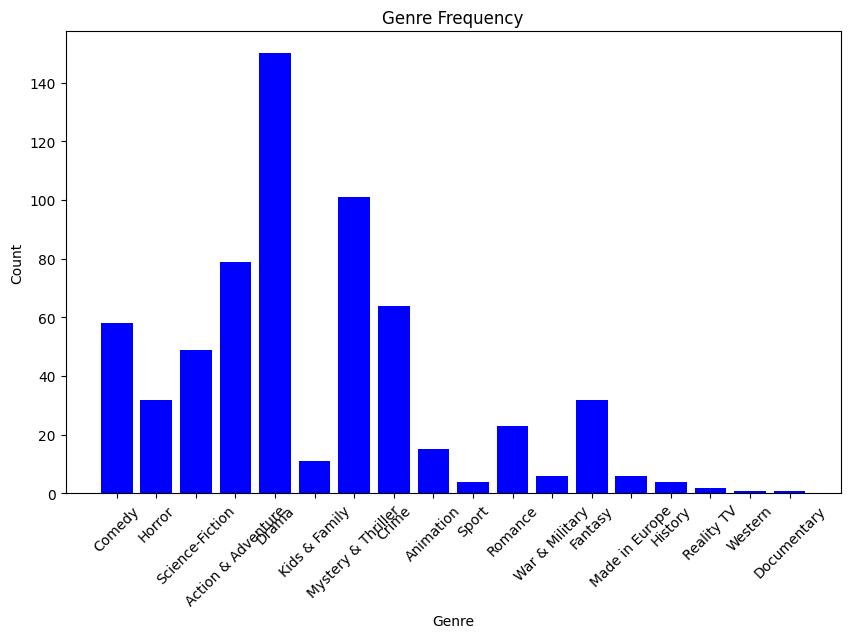

In [ ]:
# Write Your Code here

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


# Flattening the Genre List
all_genres = [genre for sublist in merged_df['Genre'] for genre in sublist]

# Counting Frequency
genre_counts = Counter(all_genres)

# Frequency Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='Blue')
plt.title('Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



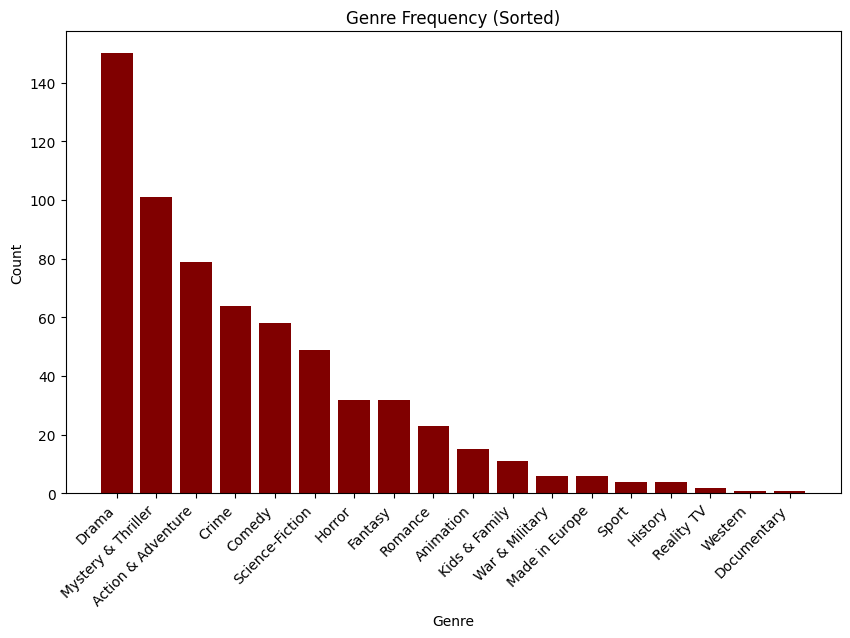

In [ ]:
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

# Frequency Bar Chart (Sorted)
plt.figure(figsize=(10, 6))
plt.bar(sorted_genre_counts.keys(), sorted_genre_counts.values(), color='maroon')
plt.title('Genre Frequency (Sorted)')
plt.xlabel('Genre')
plt.ylabel('Count')
#By setting ha='right', we ensure that the rotated labels are aligned to the right edge of the tick mark, making them more readable and preventing overlap, especially when dealing with longer label
plt.xticks(rotation=45,ha='right')
plt.show()

The above bar chart visualizes the distribution of genres in a dataset, related to movies or TV shows. Here's a breakdown of what the chart conveys:

**X-axis:**
The x-axis represents different genres. The specific genres are not explicitly labeled in the image, but you can see categories like "Drama," "Mystery & Thriller," "Comedy," and others.

**Y-axis:**
The y-axis represents the count or frequency of movies or TV shows belonging to each genre.

**Bars**:
Each bar corresponds to a genre on the x-axis.The height of the bar represents the number of items (movies or TV shows) that belong to that genre.

**Interpretation**:
The chart shows that "Drama" is the most frequent genre in the dataset, followed by "Mystery & Thriller" and "Comedy."
Genres like "Fantasy," "Romance," "Animation," and "Kids & Family" have lower frequencies.
"War & Military," "History," "Reality TV," "Western," and "Documentary" are the least frequent genres in the dataset.


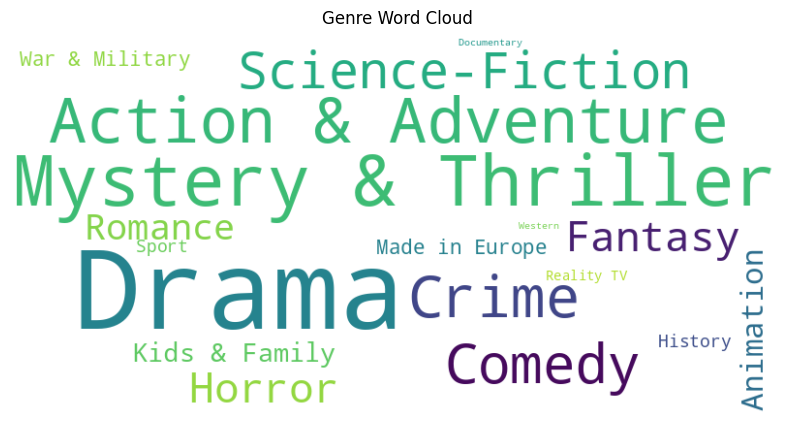

In [ ]:
#Let's Visvalize it using word cloud
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

The word cloud confirms the above conclusions

## **Finding Predominant Streaming Service**

In [ ]:
merged_df['Streaming Services'].describe()

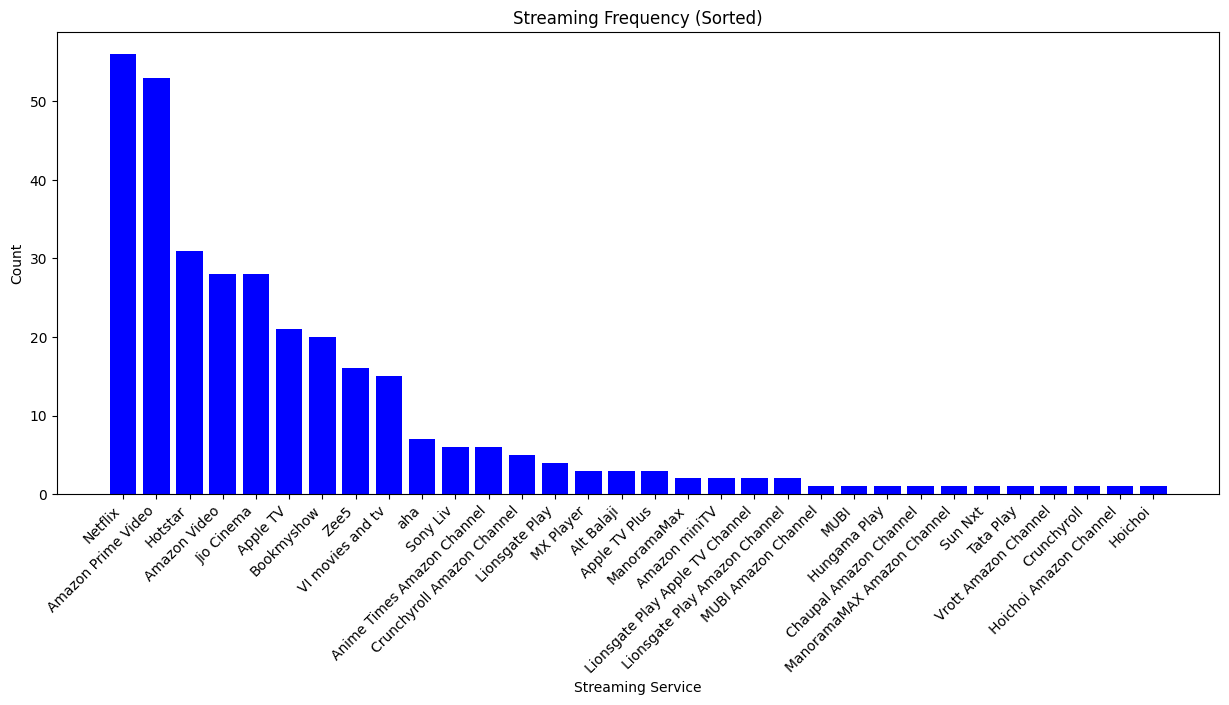

In [ ]:
# Write Your Code here
# Flattening the Genre List
all_streaming_services = [service for sublist in merged_df['Streaming Services'] for service in sublist]

# Counting Frequency
streaming_services_counts = Counter(all_streaming_services)
sorted_streaming_services_counts = dict(sorted(streaming_services_counts.items(), key=lambda item: item[1], reverse=True))

# Frequency Bar Chart (Sorted)
plt.figure(figsize=(15, 6))
plt.bar(sorted_streaming_services_counts.keys(), sorted_streaming_services_counts.values(), color='blue')
plt.title('Streaming Frequency (Sorted)')
plt.xlabel('Streaming Service')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()


The bar chart above visualizes the frequency of different streaming services associated with movies or TV shows. Here's a breakdown:

**X-axis:**
The x-axis represents the names of various streaming services, such as Netflix, Amazon Prime Video, Hotstar, etc.

**Y-axis:**
The y-axis represents the count or frequency of how often each streaming service is associated with the movies or TV shows in the dataset.

**Bars:**
Each bar corresponds to a streaming service.
The height of the bar indicates the number of times that streaming service is present in the data.
Interpretation:

*Dominant Streaming Services:* Netflix and Amazon Prime Video are the most frequently associated streaming services, with significantly higher bars compared to others.
Mid-Tier Services: Services like Hotstar, Amazon Video, and Jio Cinema have a moderate presence.

*Less Frequent Services:* Services like Apple TV, Bookmyshow, Zee5, and others have lower frequencies, indicating they are less commonly associated with the content in the dataset.

Overall, the chart provides a visual representation of the popularity and distribution of different streaming services associated with the movies or TV shows in the dataset.

We can further explore the relative frequency of each streaming service for  movies or TV shows in the dataset seperately, which would be further helpful in understanding relative popularity of streaming among tv show and movie audiences




In [ ]:
#Let's Visvalize it using word cloud
#Let's Visvalize it using word cloud
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(streaming_services_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming Service Word Cloud')
plt.show()

NameError: name 'WordCloud' is not defined

The word cloud confirms the above conclusions

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format


In [ ]:
#saving filter data as Filter Data in csv format


# **Dataset Drive Link (View Access with Anyone) -**


# ***Congratulations!!! You have completed your Assignment.***